# Домашнее задание

Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Реализовать самостоятельно логистическую регрессию  
Обучить ее методом градиентного спуска  
Методом nesterov momentum  
Методом rmsprop  

## Дополнительное задание *  
В качестве dataset’а взять Iris, оставив 2 класса:  
Iris Versicolor  
Iris Virginica  

In [194]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# загружаем датасет про ирисы

iris = datasets.load_iris()

In [82]:
type(iris)

sklearn.utils.Bunch

In [83]:
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename


In [84]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [86]:
# формируем единый датафрейм с признаками и целевой переменной 'variety_num'

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['variety_num'])
data_iris = pd.concat([X, y], axis=1)

data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
data_iris['variety_num'].value_counts()

2    50
1    50
0    50
Name: variety_num, dtype: int64

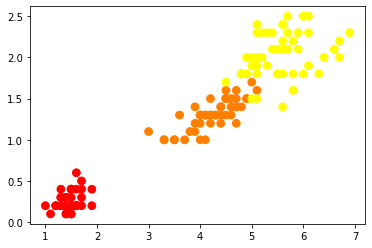

In [88]:
# строим график распределения классов цветков ириса

plt.scatter(data_iris['petal length (cm)'], data_iris['petal width (cm)'], c=data_iris.variety_num, cmap='autumn', s=60)
plt.show()

In [89]:
# исключаем класс Setosa, фильтруя датафрейм 

data_iris = data_iris.query('variety_num != 0')

In [90]:
# зададим марки классов для цветков, в правильной нумерации, 0 - versicolor, 1 - virginica

data_iris['variety_num'] = data_iris.variety_num.replace({1: 0, 2: 1})

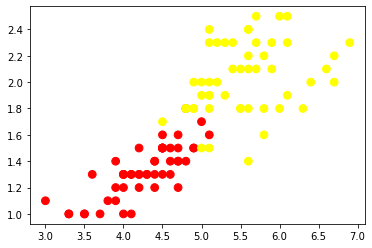

In [91]:
plt.scatter(data_iris['petal length (cm)'], data_iris['petal width (cm)'], c=data_iris.variety_num, cmap='autumn', s=60)
plt.show()

In [103]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety_num'] 
data_iris.columns = columns

In [104]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety_num
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


## Реализация методом градиентного спуска

In [177]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50
lr =  0.05

grad_loss = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    
    # Классифицирующая функция, пропущенная через сигмоиду
    predictions = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x3 + theta[4] * x4
    h = 1. / (1 + np.exp(-predictions))
    
    theta[0] -= lr * np.sum(h - y) / len(predictions)
    theta[1] -= lr * np.sum(x1 * (h - y))/ len(predictions)
    theta[2] -= lr * np.sum(x2 * (h - y)) / len(predictions)
    theta[3] -= lr * np.sum(x3 * (h - y)) / len(predictions)
    theta[4] -= lr * np.sum(x4 * (h - y)) / len(predictions)
    
    loss = np.sum(((-y) * np.log(h)) - ((1 - y) * np.log(1 - h))) / len(predictions)
    grad_loss.append(loss)
    
    if _ % 5 == 0:
        print(loss)
        
print('=====================================================================================================')    
print(theta[0], theta[1], theta[2], theta[3], theta[4])

4.75988717776054
0.9152862970459443
0.8978437520810278
0.8829656372402284
0.8684426985063541
0.8542694257827854
0.8404401075528051
0.8269488520033209
0.8137896079775959
0.8009561856259669
0.1981965268345224 -0.329339921127702 1.147187170190122 -0.2706829424888639 0.0481054698525843


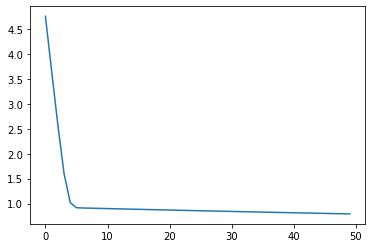

In [178]:
plt.plot(grad_loss);

### Реализация методом nesterov momentum

In [234]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50
lr =  0.5
alpha = 0.8
exp_avg_0, exp_avg_1, exp_avg_2, exp_avg_3, exp_avg_4 = 0, 0, 0, 0, 0

nest_loss = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    nester_0 = theta[0] - (alpha * exp_avg_0)
    nester_1 = theta[1] - (alpha * exp_avg_1)
    nester_2 = theta[2] - (alpha * exp_avg_2)
    nester_3 = theta[3] - (alpha * exp_avg_3)
    nester_4 = theta[4] - (alpha * exp_avg_4)
    predictions = nester_0 + nester_1 * x1 + nester_2 * x2 + nester_3 * x3 + nester_4 * x4
    
    h = 1. / (1 + np.exp(-predictions))
    loss = np.sum(((-y) * np.log(h)) - ((1 - y) * np.log(1 - h))) / len(predictions)
    nest_loss.append(loss)

    exp_avg_0 = (alpha * exp_avg_0) + (lr*(1-alpha)) * np.sum(h - y) / len(predictions)
    exp_avg_1 = (alpha * exp_avg_1) + (lr*(1-alpha)) * np.sum(x1 * (h - y)) / len(predictions)
    exp_avg_2 = (alpha * exp_avg_2) + (lr*(1-alpha)) * np.sum(x2 * (h - y)) / len(predictions)
    exp_avg_3 = (alpha * exp_avg_3) + (lr*(1-alpha)) * np.sum(x3 * (h - y)) / len(predictions)
    exp_avg_4 = (alpha * exp_avg_4) + (lr*(1-alpha)) * np.sum(x4 * (h - y)) / len(predictions)
    
    
    theta[0] -= exp_avg_0
    theta[1] -= exp_avg_1
    theta[2] -= exp_avg_2
    theta[3] -= exp_avg_3
    theta[4] -= exp_avg_4
    
    if _ % 10 == 0:
        print(loss)

print('=====================================================================================================')   
print(theta[0], theta[1], theta[2], theta[3], theta[4])

1.1629634217358231
0.5302180162311249
0.48616937941756583
0.338249600908806
0.30126592999395163
-1.3753896585236303 -2.031014201457457 -0.8146404524465622 3.280397961192116 0.2588656939761262


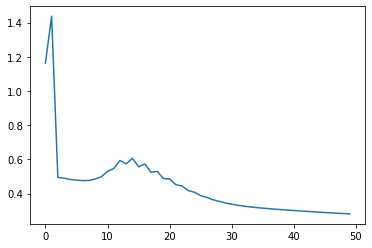

In [235]:
plt.plot(nest_loss);

### Реализация методом rmsprop

In [238]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50
lr =  0.05
alpha = 0.7
exp_avg_0, exp_avg_1, exp_avg_2, exp_avg_3, exp_avg_4 = 0, 0, 0, 0, 0
eps = 1

rmsp_loss = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    
    predictions = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x3 + theta[4] * x4
    
    h = 1. / (1 + np.exp(-predictions))
    loss = np.sum(((-y) * np.log(h)) - ((1 - y) * np.log(1 - h))) / len(predictions)
    rmsp_loss.append(loss)

    exp_avg_0 = (alpha * exp_avg_0) + (lr*(1-alpha)) * ((np.sum(h - y) / len(predictions))**2)
    exp_avg_1 = (alpha * exp_avg_1) + (lr*(1-alpha)) * ((np.sum(x1 * (h - y)) / len(predictions))**2)
    exp_avg_2 = (alpha * exp_avg_2) + (lr*(1-alpha)) * ((np.sum(x2 * (h - y)) / len(predictions))**2)
    exp_avg_3 = (alpha * exp_avg_3) + (lr*(1-alpha)) * ((np.sum(x3 * (h - y)) / len(predictions))**2)
    exp_avg_4 = (alpha * exp_avg_4) + (lr*(1-alpha)) * ((np.sum(x4 * (h - y)) / len(predictions))**2)
    
    
    theta[0] -= (lr / np.sqrt(exp_avg_0 + eps)) * (np.sum(h - y) / len(predictions))
    theta[1] -= (lr / np.sqrt(exp_avg_1 + eps)) * (np.sum(x1 * (h - y)) / len(predictions))
    theta[2] -= (lr / np.sqrt(exp_avg_2 + eps)) * (np.sum(x2 * (h - y)) / len(predictions))
    theta[3] -= (lr / np.sqrt(exp_avg_3 + eps)) * (np.sum(x3 * (h - y)) / len(predictions))
    theta[4] -= (lr / np.sqrt(exp_avg_4 + eps)) * (np.sum(x4 * (h - y)) / len(predictions))
    
    if _ % 5 == 0:
        print(loss)
    
print('=====================================================================================================')   
print(theta[0], theta[1], theta[2], theta[3], theta[4])

2.302412774041258
0.5660768988912556
0.5596061326656988
0.5533891565531651
0.547309324769451
0.5413693172314362
0.5355663227025884
0.5298967076259736
0.5243567855601788
0.5189429425946335
-0.25243851362638625 -1.2546376317269492 1.0652671015071766 0.7749159087263022 0.832315675888724


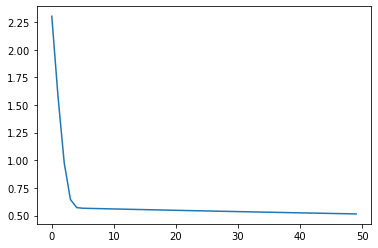

In [239]:
plt.plot(rmsp_loss);

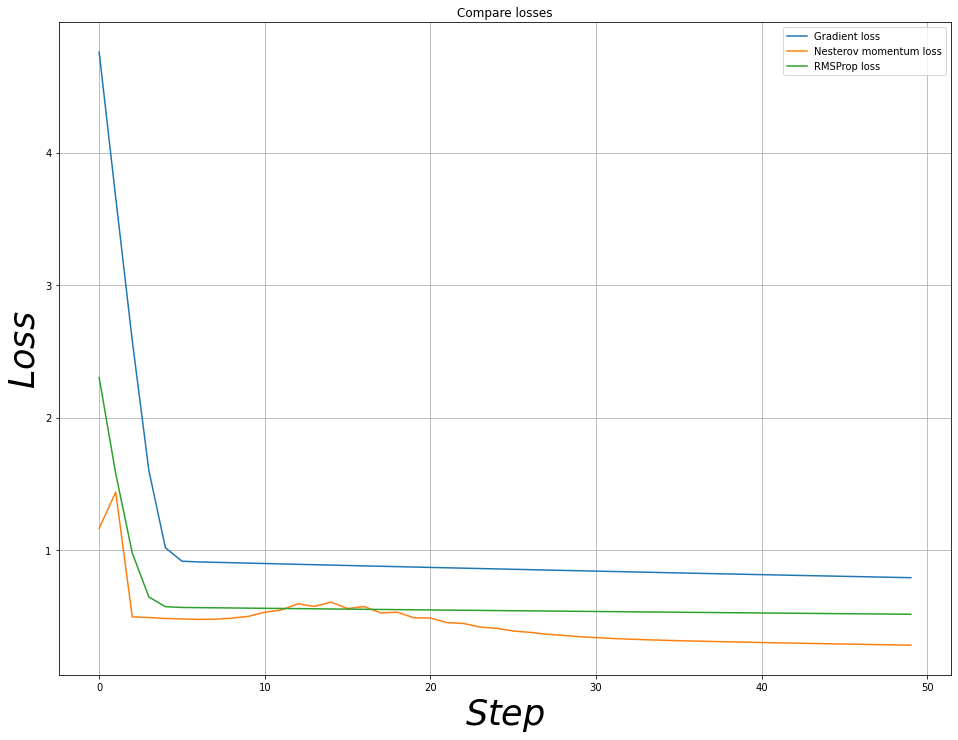

In [240]:
# Сравним скорость убывания ошибки

plt.figure(figsize=(16,12), edgecolor = 'black')
plt.plot(range(50), grad_loss, label='Gradient loss' )
plt.plot(range(50), nest_loss, label='Nesterov momentum loss' )
plt.plot(range(50), rmsp_loss, label='RMSProp loss' )
plt.title('Compare losses')
plt.xlabel('$Step$', fontsize=35)
plt.ylabel('$Loss$', fontsize=35)
plt.legend()
plt.grid()
plt.show()